In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

In [2]:
accident_data = pd.read_csv('C:/Users/Mastan/Desktop/Tableau Project/Crash_Data.csv', low_memory=False)

In [3]:
accident_data.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [4]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [5]:
accident_data['Time'] = pd.to_datetime(accident_data['Time'], format='%H:%M', errors='coerce')
accident_data['Time'].head()

0   1900-01-01 00:30:00
1   1900-01-01 23:31:00
2   1900-01-01 23:00:00
3   1900-01-01 22:25:00
4   1900-01-01 05:15:00
Name: Time, dtype: datetime64[ns]

In [6]:
accident_data['Speed Limit'].replace({'<40': np.nan}, inplace=True)

# Convert the column to numeric
accident_data['Speed Limit'] = pd.to_numeric(accident_data['Speed Limit'], errors='coerce')


In [7]:
missing_values = accident_data.isnull().sum()
missing_values

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        709
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [8]:
# Filling missing values for 'Time' and 'Speed Limit' columns with the median
accident_data['Time'].fillna(accident_data['Time'].median(), inplace=True)
accident_data['Speed Limit'].fillna(accident_data['Speed Limit'].median(), inplace=True)

# Filling missing values for 'Gender' and 'Bus Involvement' columns with mode
accident_data['Gender'].fillna(accident_data['Gender'].mode()[0], inplace=True)
accident_data['Bus Involvement'].fillna(accident_data['Bus Involvement'].mode()[0], inplace=True)

In [9]:
accident_data.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                 0
Crash Type                           0
Bus Involvement                      0
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                          0
Road User                            0
Gender                               0
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [10]:
# Drop columns with a high percentage of missing values
columns_to_drop = ['National Remoteness Areas', 'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type']
accident_data.drop(columns=columns_to_drop, inplace=True)

# Impute missing values for remaining columns
accident_data['Heavy Rigid Truck Involvement'].fillna(accident_data['Heavy Rigid Truck Involvement'].mode()[0], inplace=True)
accident_data['Articulated Truck Involvement'].fillna(accident_data['Articulated Truck Involvement'].mode()[0], inplace=True)
accident_data['Age Group'].fillna(accident_data['Age Group'].mode()[0], inplace=True)

# Check for missing values after handling
accident_data.isnull().sum()

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Heavy Rigid Truck Involvement    0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [11]:
accident_data.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,1900-01-01 00:30:00,Single,No,No,No,80.0,Motorcycle rider,Male,38,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,1900-01-01 23:31:00,Multiple,No,No,No,110.0,Pedestrian,Female,28,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,1900-01-01 23:00:00,Single,No,No,No,80.0,Passenger,Male,19,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,1900-01-01 22:25:00,Single,No,No,No,80.0,Driver,Male,23,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,1900-01-01 05:15:00,Single,No,No,No,80.0,Motorcycle rider,Male,46,No,No,40_to_64,Weekend,Night


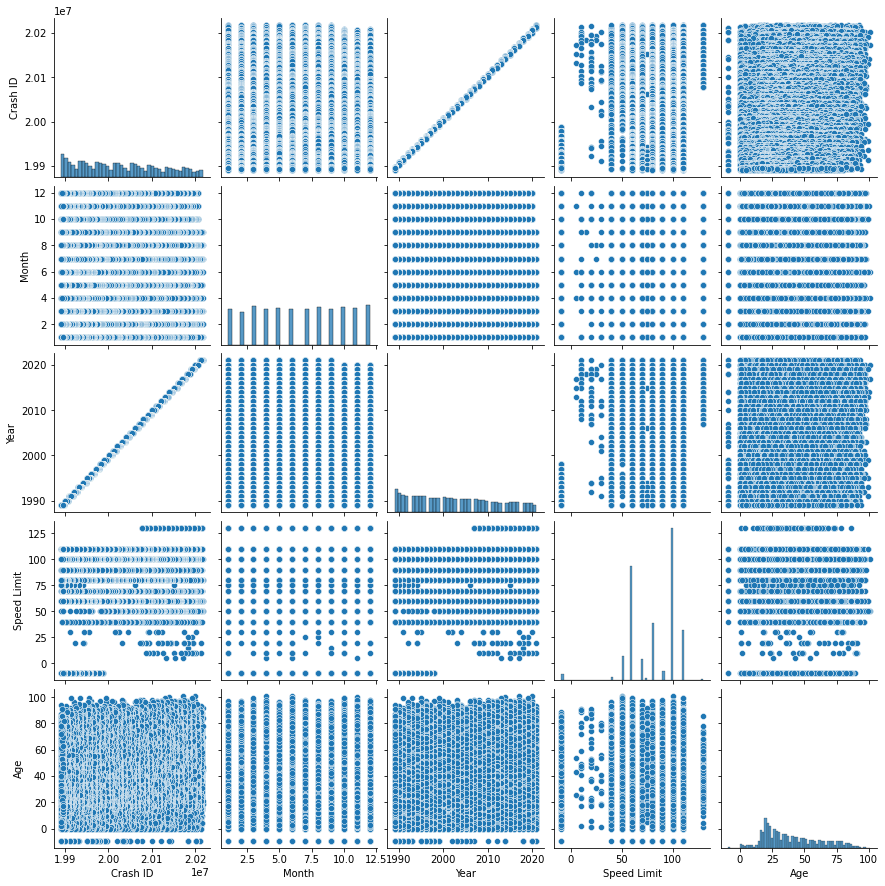

In [12]:
# Bivariate analysis
sns.pairplot(accident_data)  # Pairplot for numerical columns
plt.show()

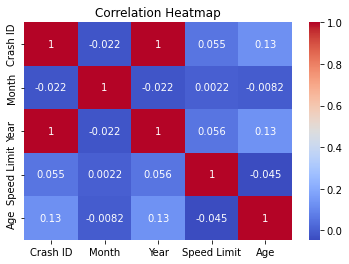

In [13]:
# Correlation analysis
correlation_matrix = accident_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

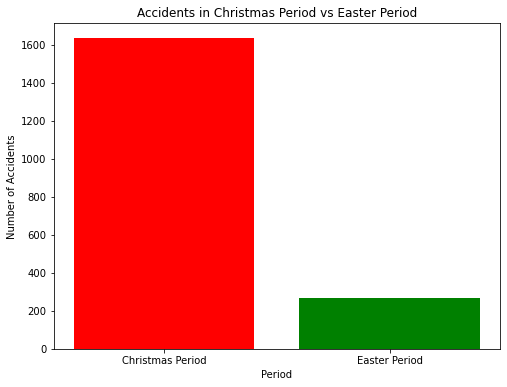

In [14]:
# Counting accidents during Christmas and Easter periods
christmas_accidents = (accident_data['Christmas Period'] == 'Yes').sum()
easter_accidents = (accident_data['Easter Period'] == 'Yes').sum()

# Creating a bar plot to visualize accidents during Christmas and Easter periods
periods = ['Christmas Period', 'Easter Period']
accidents = [christmas_accidents, easter_accidents]

plt.figure(figsize=(8, 6))
plt.bar(periods, accidents, color=['red', 'green'])
plt.title('Accidents in Christmas Period vs Easter Period')
plt.xlabel('Period')
plt.ylabel('Number of Accidents')
plt.show()

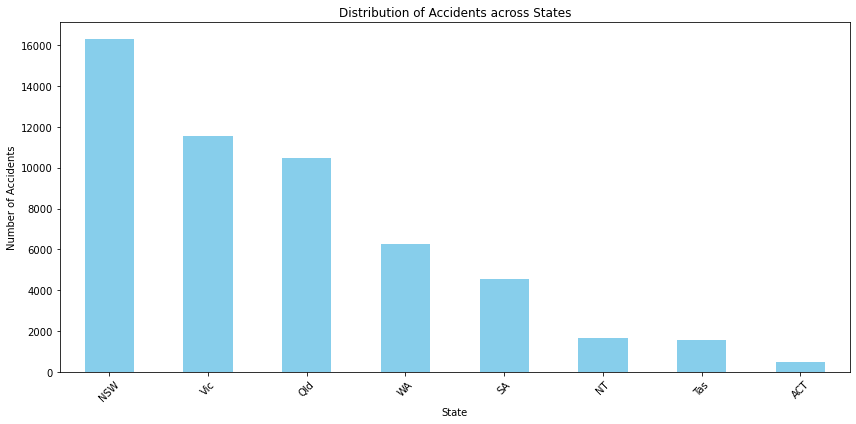

In [15]:
accidents_per_state = accident_data['State'].value_counts()

plt.figure(figsize=(12, 6))

# Creating a bar plot to compare the distribution of accidents across states
accidents_per_state.plot(kind='bar', color='skyblue')
plt.title('Distribution of Accidents across States')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotating state names for better readability
plt.tight_layout()
plt.show()

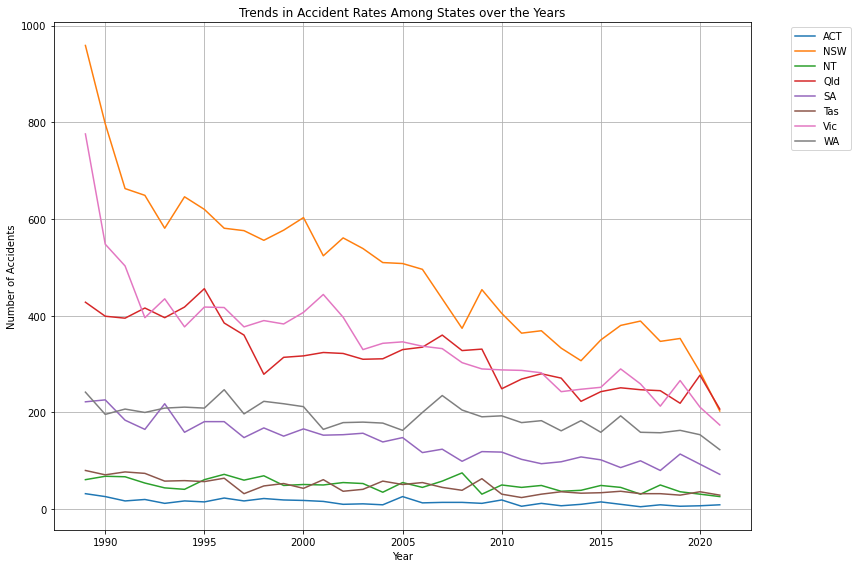

In [16]:
accidents_by_state_year = accident_data.groupby(['State', 'Year']).size().reset_index(name='Accident_Count')

plt.figure(figsize=(12, 8))

# Plotting trends of accident rates among states over the years
for state in accidents_by_state_year['State'].unique():
    state_data = accidents_by_state_year[accidents_by_state_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Accident_Count'], label=state)

plt.title('Trends in Accident Rates Among States over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

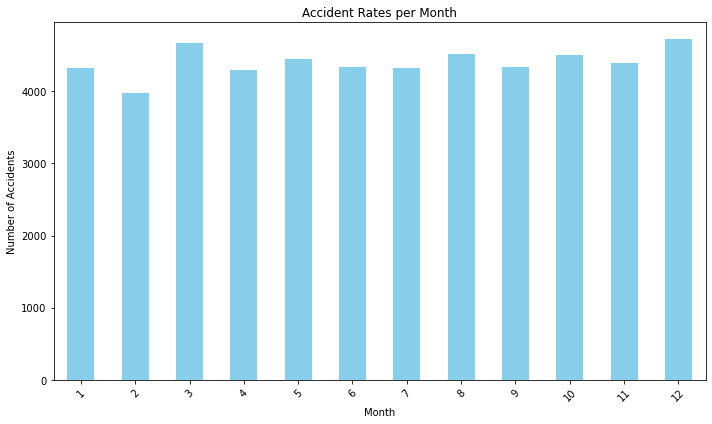

In [17]:
monthly_accidents = accident_data.groupby('Month').size()

plt.figure(figsize=(10, 6))

# Creating a bar plot to visualize accident rates per month
monthly_accidents.plot(kind='bar', color='skyblue')
plt.title('Accident Rates per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

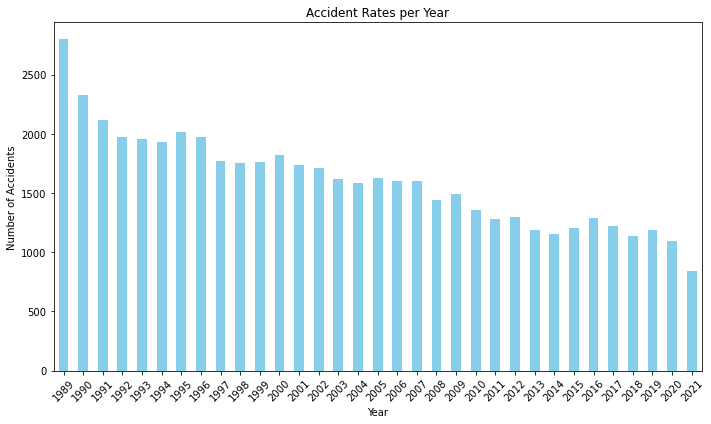

In [18]:
yearly_accidents = accident_data.groupby('Year').size()

plt.figure(figsize=(10, 6))

# Creating a bar plot to visualize accident rates per year
yearly_accidents.plot(kind='bar', color='skyblue')
plt.title('Accident Rates per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

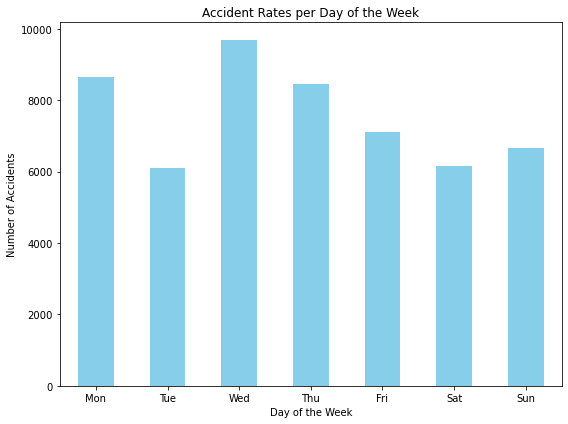

In [19]:
# Grouping by 'Day of week' to count accidents
day_of_week_accidents = accident_data['Dayweek'].value_counts().sort_index()

plt.figure(figsize=(8, 6))

# Creating a bar plot to visualize accident rates per day of the week
day_of_week_accidents.plot(kind='bar', color='skyblue')
plt.title('Accident Rates per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()

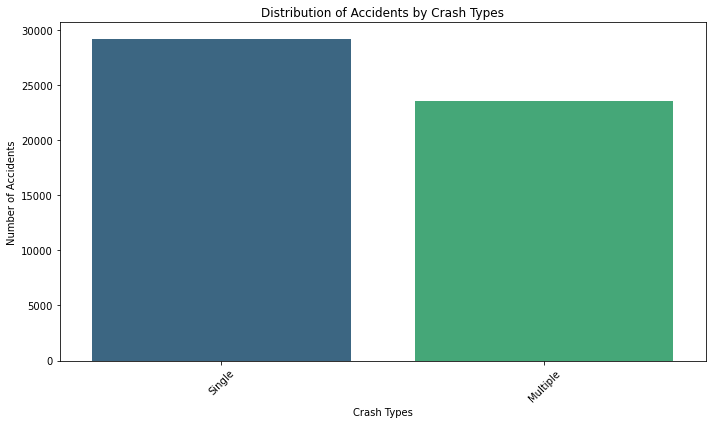

In [20]:
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the distribution of accidents by crash types using Seaborn
sns.countplot(data=accident_data, x='Crash Type', palette='viridis')
plt.title('Distribution of Accidents by Crash Types')
plt.xlabel('Crash Types')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

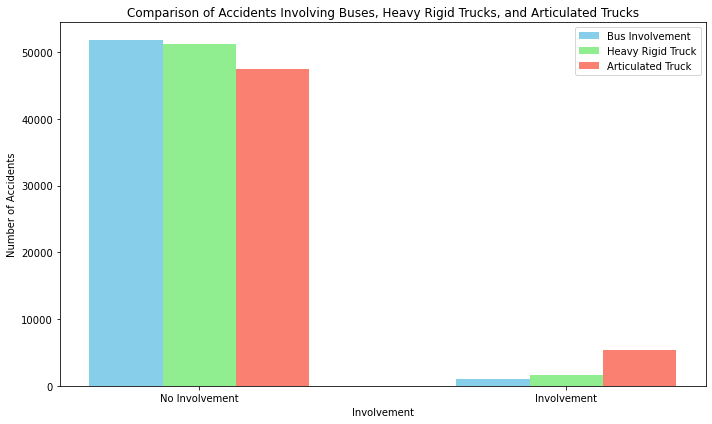

In [21]:
bus_accidents = accident_data['Bus Involvement'].value_counts()
heavy_rigid_truck_accidents = accident_data['Heavy Rigid Truck Involvement'].value_counts()
articulated_truck_accidents = accident_data['Articulated Truck Involvement'].value_counts()

# Plotting the comparison of accidents involving different vehicle types using grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(bus_accidents))

bar1 = plt.bar(index, bus_accidents, bar_width, label='Bus Involvement', color='skyblue')
bar2 = plt.bar([i + bar_width for i in index], heavy_rigid_truck_accidents, bar_width, label='Heavy Rigid Truck', color='lightgreen')
bar3 = plt.bar([i + 2 * bar_width for i in index], articulated_truck_accidents, bar_width, label='Articulated Truck', color='salmon')

plt.xlabel('Involvement')
plt.ylabel('Number of Accidents')
plt.title('Comparison of Accidents Involving Buses, Heavy Rigid Trucks, and Articulated Trucks')
plt.xticks([i + bar_width for i in index], ['No Involvement', 'Involvement'])
plt.legend()
plt.tight_layout()
plt.show()

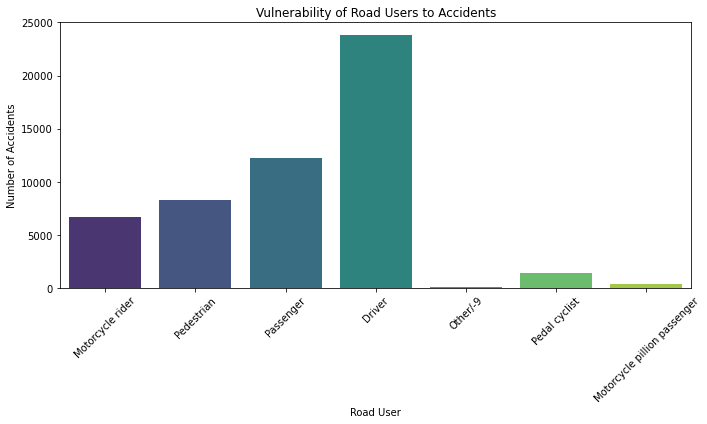

In [22]:
plt.figure(figsize=(10, 6))

# Creating a count plot using Seaborn to identify road users more vulnerable to accidents
sns.countplot(data=accident_data, x='Road User', palette='viridis')
plt.title('Vulnerability of Road Users to Accidents')
plt.xlabel('Road User')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

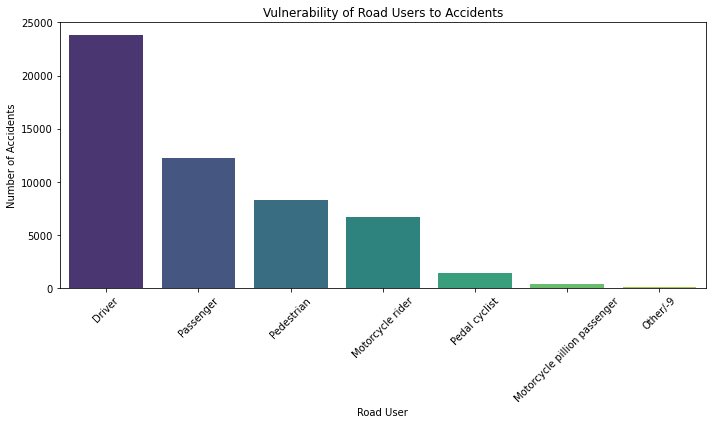

In [23]:
plt.figure(figsize=(10, 6))

# Creating a count plot to identify road users more vulnerable to accidents using Seaborn with sorting
sns.countplot(data=accident_data, x='Road User', order=accident_data['Road User'].value_counts().index, palette='viridis')
plt.title('Vulnerability of Road Users to Accidents')
plt.xlabel('Road User')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

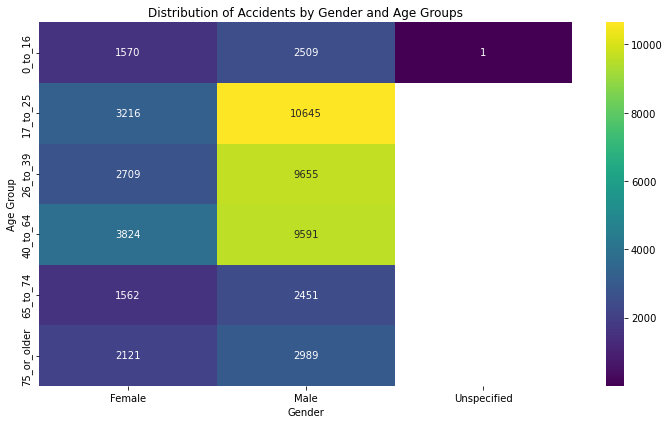

In [24]:
# Creating a pivot table to prepare data for heatmap
pivot_table = accident_data.pivot_table(index='Age Group', columns='Gender', aggfunc='size')

plt.figure(figsize=(10, 6))

# Creating a heatmap to analyze the distribution of accidents by gender and age groups
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')
plt.title('Distribution of Accidents by Gender and Age Groups')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

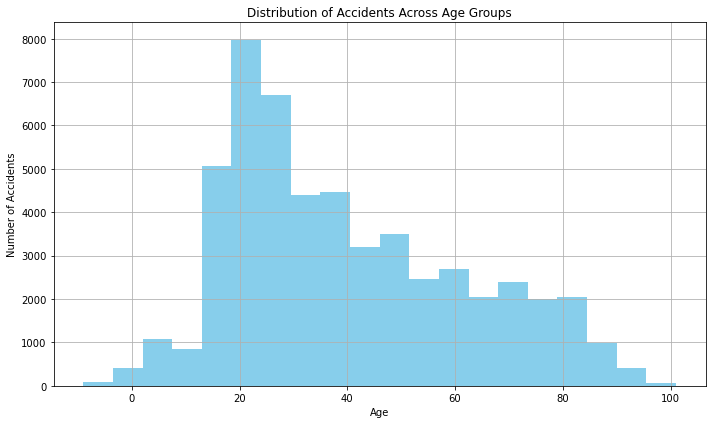

In [25]:
plt.figure(figsize=(10, 6))

# Creating a bar plot to analyze the distribution of accidents across different age groups
accident_data['Age'].hist(bins=20, color='skyblue')
plt.title('Distribution of Accidents Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

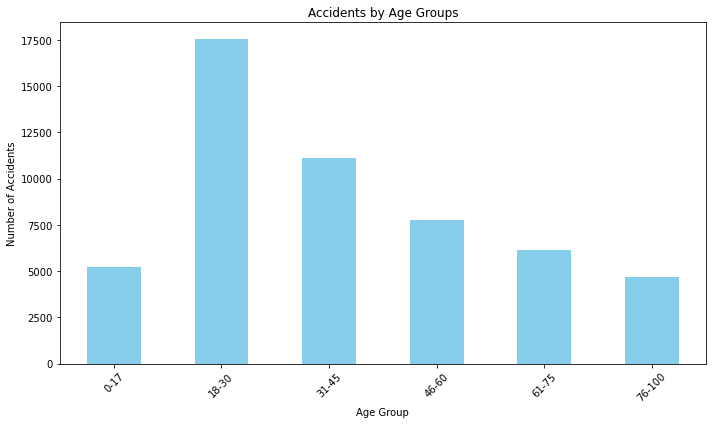

In [26]:
age_bins = [0, 17, 30, 45, 60, 75, 100]  # Define age group ranges (adjust as needed)
age_labels = ['0-17', '18-30', '31-45', '46-60', '61-75', '76-100']  # Labels for age groups

# Categorize individuals into age groups
accident_data['Age Group'] = pd.cut(accident_data['Age'], bins=age_bins, labels=age_labels)

# Calculate the count of accidents in each age group
accidents_by_age_group = accident_data['Age Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Creating a bar plot to visualize accidents by age groups
accidents_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Accidents by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

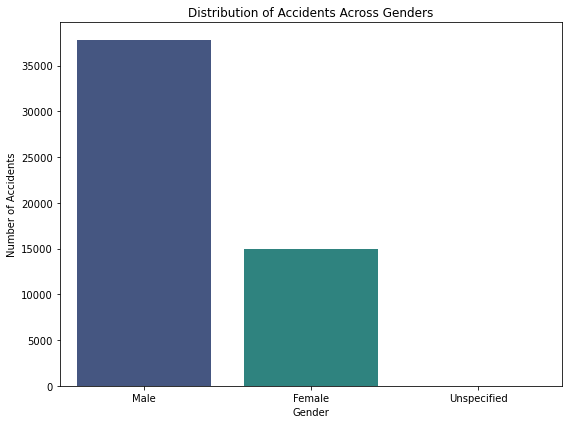

In [27]:
plt.figure(figsize=(8, 6))

# Creating a count plot to analyze the distribution of accidents across different genders
sns.countplot(data=accident_data, x='Gender', palette='viridis')
plt.title('Distribution of Accidents Across Genders')
plt.xlabel('Gender')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

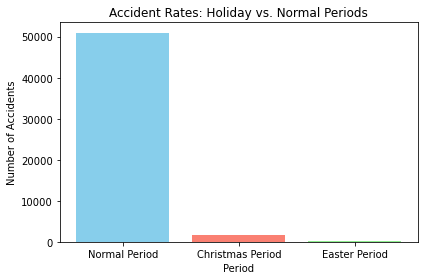

In [28]:
normal_accidents = len(accident_data[(accident_data['Christmas Period'] == 'No') & (accident_data['Easter Period'] == 'No')])
christmas_accidents = len(accident_data[accident_data['Christmas Period'] == 'Yes'])
easter_accidents = len(accident_data[accident_data['Easter Period'] == 'Yes'])

# Creating a bar plot to compare accident rates during holiday periods and normal periods
plt.bar(['Normal Period', 'Christmas Period', 'Easter Period'], [normal_accidents, christmas_accidents, easter_accidents], color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Accident Rates: Holiday vs. Normal Periods')
plt.xlabel('Period')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

In [29]:
accident_data.drop_duplicates(inplace=True)
duplicate_rows = accident_data[accident_data.duplicated()]
duplicate_rows

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day


In [30]:
accident_data.dropna(axis=0, how='any', inplace=True)
missing_data = accident_data.isnull().sum()
missing_data

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Heavy Rigid Truck Involvement    0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [31]:
unique_crash_ids = accident_data['Crash ID'].nunique()
total_rows = len(accident_data)
print(f"\nUnique Crash IDs: {unique_crash_ids} out of {total_rows} total rows")


Unique Crash IDs: 47374 out of 52380 total rows


In [32]:
accident_data.drop_duplicates(subset='Crash ID', keep='first', inplace=True)
unique_crash_ids = accident_data['Crash ID'].nunique()
total_rows = len(accident_data)
print(f"Unique Crash IDs: {unique_crash_ids} out of {total_rows} total rows")

Unique Crash IDs: 47374 out of 47374 total rows


In [33]:
accident_data.to_csv('C:/Users/Mastan/Desktop/Tableau Project/accident_data_clean.csv', index=False)